In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
import seaborn as sns;sns.set()

[[ 3.35320909e+00  1.69958043e+00]
 [ 1.36678633e+00  6.34971633e-01]
 [ 2.24592863e-01  4.77028154e+00]
 [ 4.43598630e-01  3.11530945e+00]
 [ 2.76808540e+00  1.08782923e+00]
 [ 1.25566754e+00  3.38204112e+00]
 [ 1.00372519e+00  4.19147702e+00]
 [ 3.20903274e+00  1.78597253e+00]
 [ 7.43873988e-01  4.12240568e+00]
 [ 1.57322172e+00  4.83933793e-01]
 [ 7.67522789e-01  4.39759671e+00]
 [ 1.83375842e+00  7.54036153e-01]
 [ 1.10123507e+00  4.88977075e+00]
 [ 4.31891060e-01  4.33495456e+00]
 [ 1.89446550e+00  1.37913750e+00]
 [ 3.48515439e+00  1.46435135e+00]
 [ 2.73124907e+00  2.49704755e-01]
 [ 5.72793810e-01  4.08805543e+00]
 [ 1.26572308e+00  6.20712897e-01]
 [ 1.59331788e+00  1.22121317e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 7.89338559e-01  4.33748653e+00]
 [ 1.61152972e+00  1.82347242e+00]
 [ 2.77180174e-01  4.84428322e+00]
 [ 2.36923352e+00  7.94735861e-01]
 [ 9.14338767e-01  4.55014643e+00]
 [ 1.60841463e+00  4.01800537e-01]
 [ 9.82570091e-01  5.37530962e+00]
 [ 1.24258802e+00  4

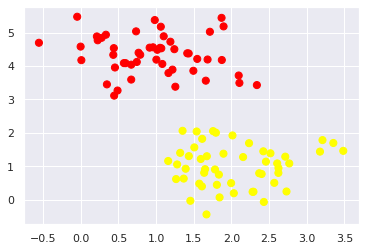

In [ ]:
from sklearn.datasets import make_blobs
X,y= make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="autumn");
print(X,y)

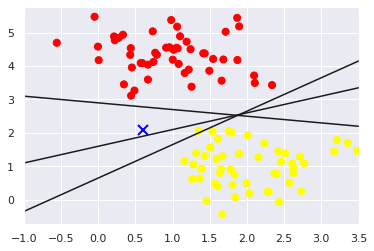

In [ ]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap = 'autumn')
plt.plot([0.6],[2.1], 'x', color = 'blue', markeredgewidth=2, markersize = 10)

for m,b in [(1,0.65), (0.5,1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m* xfit +b, '-k')

plt.xlim(-1,3.5);

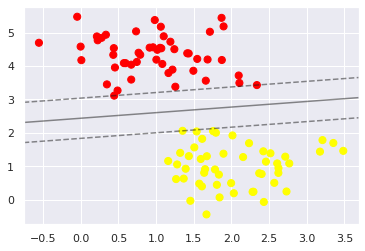

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a 2D SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  #create grid to evaluate model
  x = np.linspace(xlim[0],xlim[1],30)
  y = np.linspace(ylim[0],ylim[1],30)
  Y, X = np.meshgrid(y,x)
  xy=np.vstack([X.ravel(), Y.ravel()]).T
  P= model.decision_function(xy).reshape(X.shape)

  #plot decision boundary and margins
  ax.contour(X,Y, P, colors= 'k',
             levels=[-1,0,1], alpha=0.5,
             linestyles=['--','-','--'])
  #plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap = 'autumn')
plot_svc_decision_function(model);

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

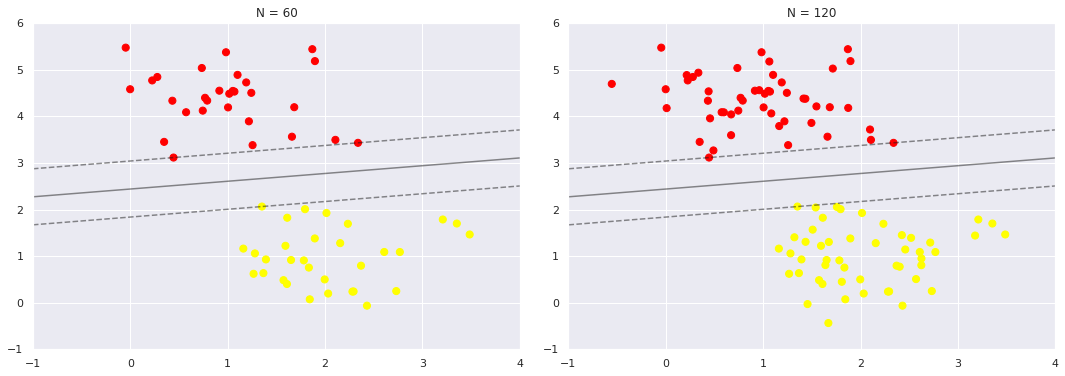

In [ ]:
def plot_svm(N=10,ax=None):
  X,y = make_blobs(n_samples=100,centers =2, random_state=0,cluster_std=0.60)
  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear',C=1E10)
  model.fit(X,y)

  ax = ax or plt.gca()
  ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
  ax.set_xlim(-1,4)
  ax.set_ylim(-1,6)
  plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60,120]):
  plot_svm(N,axi)
  axi.set_title('N = {0}'.format(N))

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10,100], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 100), value=10), Output()), _dom_classes=('widget…

In [ ]:
reg = SVC(kernel='rbf',C=1E6)#Reglularization Parameter
reg.fit(X,y)

SVC(C=1000000.0)

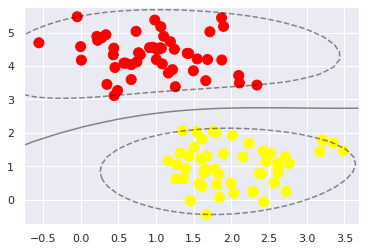

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, s= 100, cmap='autumn')
plot_svc_decision_function(reg)
plt.scatter(reg.support_vectors_[:,0],reg.support_vectors_[:,1],s=300, lw=1, facecolors='none');

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("titanic.csv")

In [ ]:
df["Age"].fillna(29,inplace = True)
df["Cabin"].fillna("UNKNOWN",inplace = True)
df["Embarked"].fillna("U",inplace = True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNKNOWN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNKNOWN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNKNOWN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,UNKNOWN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,UNKNOWN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


[[3 0]
 [1 1]
 [3 1]
 ...
 [3 0]
 [1 1]
 [3 0]] [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1

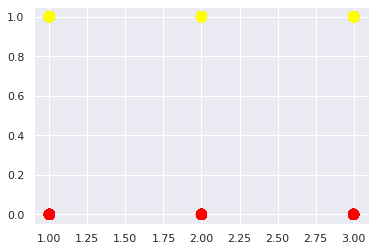

In [ ]:
X= df.iloc[:, [2,1]].values
y= df.iloc[:, 1].values
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="autumn");
print(X,y)

Performing SVM with root Attribute

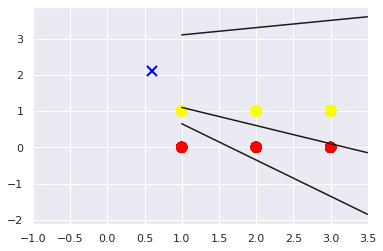

In [ ]:
xfit = np.linspace(1,3.5)
plt.scatter(X[:,0], X[:, 1], c=y, s=100, cmap = 'autumn')
plt.plot([0.6],[2.1], 'x', color = 'blue', markeredgewidth=2, markersize = 10)

for m,b in [(-1,1.65), (-0.5,1.6), (0.2, 2.9)]:
  plt.plot(xfit, m* xfit +b, '-k')

plt.xlim(-1,3.5);

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a 2D SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  #create grid to evaluate model
  x = np.linspace(xlim[0],xlim[1],30)
  y = np.linspace(ylim[0],ylim[1],30)
  Y, X = np.meshgrid(y,x)
  xy=np.vstack([X.ravel(), Y.ravel()]).T
  P= model.decision_function(xy).reshape(X.shape)

  #plot decision boundary and margins
  ax.contour(X,Y, P, colors= 'k',
             levels=[-1,0,1], alpha=0.5,
             linestyles=['--','-','--'])
  #plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

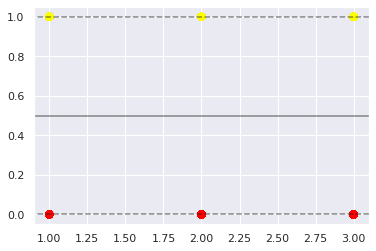

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap = 'autumn')
plot_svc_decision_function(model);

In [ ]:
reg = SVC(kernel='rbf',C=1E6)#Reglularization Parameter
reg.fit(X,y)

SVC(C=1000000.0)

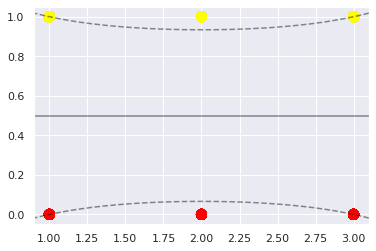

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, s= 100, cmap='autumn')
plot_svc_decision_function(reg)
plt.scatter(reg.support_vectors_[:,0],reg.support_vectors_[:,1],s=300, lw=1, facecolors='none');

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)       

In [ ]:
reg = SVC(kernel='rbf',C=1E6)#Reglularization Parameter
reg.fit(x_train,y_train)

SVC(C=1000000.0)

In [ ]:
y_pred= reg.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
cm

array([[139,   0],
       [  0,  84]])

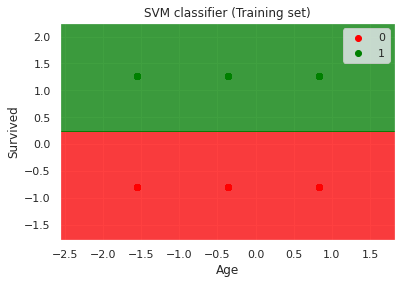

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, reg.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('SVM classifier (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Survived')  
plt.legend()  
plt.show()  

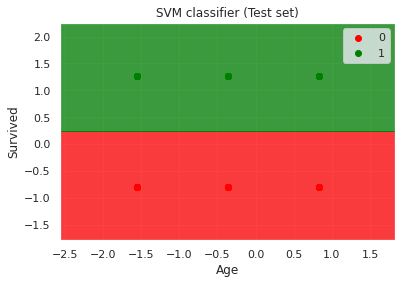

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, reg.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('SVM classifier (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Survived')  
plt.legend()  
plt.show()  

Classification using SVM

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNKNOWN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNKNOWN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNKNOWN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,UNKNOWN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,UNKNOWN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
stringValues = ["Sex"]
for i in stringValues:
  # get all unique values in a list. Index of each 
  uniqueList = list(set(df[i]))
  # Create replace dictionary with key as string to be replaced and value as integer encoding for the string
  replaceDict = {}
  for j in range(len(uniqueList)):
    replaceDict[uniqueList[j]] = j
  df = df.replace({i : replaceDict})
  df

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,UNKNOWN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,UNKNOWN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,UNKNOWN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,UNKNOWN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.0,1,2,W./C. 6607,23.4500,UNKNOWN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [ ]:
X= df.iloc[:, [5]].values
y= df.iloc[:, 1].values
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)



print(X,y)

[[-0.58165904]
 [ 0.64932701]
 [-0.27391253]
 [ 0.41851712]
 [ 0.41851712]
 [-0.04310264]
 [ 1.88031305]
 [-2.1203916 ]
 [-0.1969759 ]
 [-1.19715206]
 [-1.96651834]
 [ 2.18805956]
 [-0.73553229]
 [ 0.72626363]
 [-1.19715206]
 [ 1.95724968]
 [-2.1203916 ]
 [-0.04310264]
 [ 0.11077061]
 [-0.04310264]
 [ 0.41851712]
 [ 0.34158049]
 [-1.12021543]
 [-0.12003927]
 [-1.65877183]
 [ 0.64932701]
 [-0.04310264]
 [-0.81246892]
 [-0.04310264]
 [-0.04310264]
 [ 0.80320026]
 [-0.04310264]
 [-0.04310264]
 [ 2.80355258]
 [-0.12003927]
 [ 0.95707352]
 [-0.04310264]
 [-0.65859567]
 [-0.88940555]
 [-1.19715206]
 [ 0.80320026]
 [-0.1969759 ]
 [-0.04310264]
 [-2.04345497]
 [-0.81246892]
 [-0.04310264]
 [-0.04310264]
 [-0.04310264]
 [-0.04310264]
 [-0.88940555]
 [-1.73570846]
 [-0.65859567]
 [ 1.49562991]
 [-0.04310264]
 [ 2.72661596]
 [-0.04310264]
 [-0.65859567]
 [-0.08157096]
 [-1.88958171]
 [-1.42796194]
 [-0.58165904]
 [ 0.64932701]
 [ 1.1878834 ]
 [-1.96651834]
 [-0.04310264]
 [-0.04310264]
 [-0.04310

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

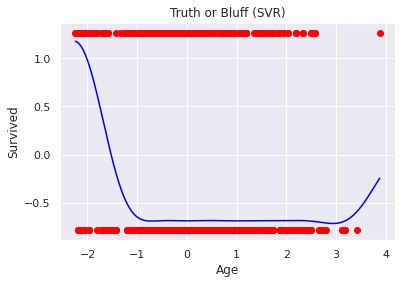

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [ ]:
reg = SVC(kernel='poly',C=1E6)#Reglularization Parameter
reg.fit(X,y)

SVC(C=1000000.0, kernel='poly')

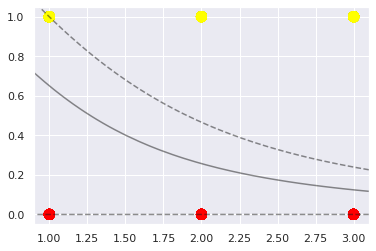

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, s= 100, cmap='autumn')
plot_svc_decision_function(reg)
plt.scatter(reg.support_vectors_[:,0],reg.support_vectors_[:,1],s=300, lw=1, facecolors='none');

In [ ]:
reg = SVC(kernel='sigmoid',C=1E6)#Reglularization Parameter
reg.fit(X,y)

SVC(C=1000000.0, kernel='sigmoid')

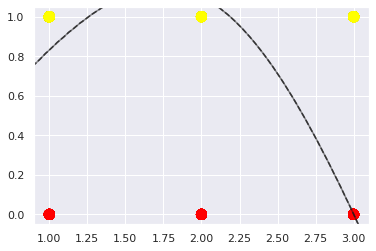

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, s= 100, cmap='autumn')
plot_svc_decision_function(reg)
plt.scatter(reg.support_vectors_[:,0],reg.support_vectors_[:,1],s=300, lw=1, facecolors='none');

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

In [ ]:
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred) 

[[22.  0.]
 [38.  1.]
 [26.  1.]
 ...
 [29.  0.]
 [26.  1.]
 [32.  0.]] [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1

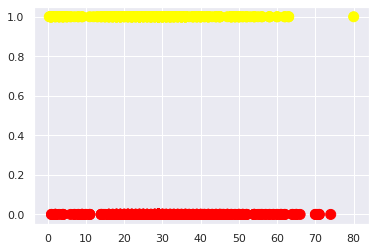

In [ ]:
X= df.iloc[:, [5,1]].values
y= df.iloc[:, 1].values
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="autumn");
print(X,y)

[[ 7.25    0.    ]
 [71.2833  1.    ]
 [ 7.925   1.    ]
 ...
 [23.45    0.    ]
 [30.      1.    ]
 [ 7.75    0.    ]] [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 

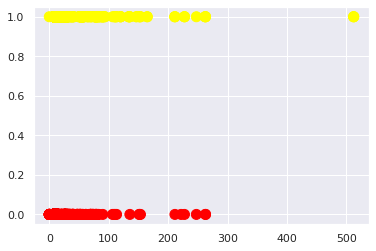

In [ ]:
X= df.iloc[:, [9,1]].values
y= df.iloc[:, 1].values
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="autumn");
print(X,y)

[[1 0]
 [1 1]
 [0 1]
 ...
 [1 0]
 [0 1]
 [0 0]] [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1

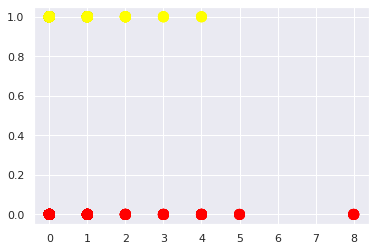

In [ ]:
X= df.iloc[:, [6,1]].values
y= df.iloc[:, 1].values
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="autumn");
print(X,y)

[[0 0]
 [0 1]
 [0 1]
 ...
 [2 0]
 [0 1]
 [0 0]] [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1

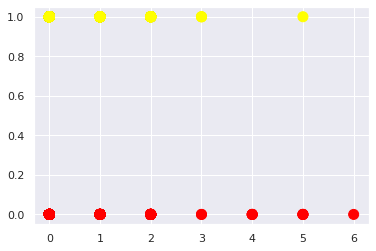

In [ ]:
X= df.iloc[:, [7,1]].values
y= df.iloc[:, 1].values
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="autumn");
print(X,y)

Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. The prefix ‘hyper_’ suggests that they are ‘top-level’ parameters that control the learning process and the model parameters that result from it.

As a machine learning engineer designing a model, you choose and set hyperparameter values that your learning algorithm will use before the training of the model even begins. In this light, hyperparameters are said to be external to the model because the model cannot change its values during learning/training.

Hyperparameters are used by the learning algorithm when it is learning but they are not part of the resulting model. At the end of the learning process, we have the trained model parameters which effectively is what we refer to as the model. The hyperparameters that were used during training are not part of this model. We cannot for instance know what hyperparameter values were used to train a model from the model itself, we only know the model parameters that were learned.

Basically, anything in machine learning and deep learning that you decide their values or choose their configuration before training begins and whose values or configuration will remain the same when training ends is a hyperparameter.

Here are some common examples
Train-test split ratio
Learning rate in optimization algorithms (e.g. gradient descent)
Choice of optimization algorithm (e.g., gradient descent, stochastic gradient descent, or Adam optimizer)
Choice of activation function in a neural network (nn) layer (e.g. Sigmoid, ReLU, Tanh)
The choice of cost or loss function the model will use
Number of hidden layers in a nn
Number of activation units in each layer
The drop-out rate in nn (dropout probability)
Number of iterations (epochs) in training a nn
Number of clusters in a clustering task
Kernel or filter size in convolutional layers
Pooling size
Batch size
Parameters
Parameters on the other hand are internal to the model. That is, they are learned or estimated purely from the data during training as the algorithm used tries to learn the mapping between the input features and the labels or targets.

Model training typically starts with parameters being initialized to some values (random values or set to zeros). As training/learning progresses the initial values are updated using an optimization algorithm (e.g. gradient descent). The learning algorithm is continuously updating the parameter values as learning progress but hyperparameter values set by the model designer remain unchanged.

At the end of the learning process, model parameters are what constitute the model itself.

Examples of parameters
The coefficients (or weights) of linear and logistic regression models.
Weights and biases of a nn
The cluster centroids in clustering
Simply put, parameters in machine learning and deep learning are the values your learning algorithm can change independently as it learns and these values are affected by the choice of hyperparameters you provide. So you set the hyperparameters before training begins and the learning algorithm uses them to learn the parameters. Behind the training scene, parameters are continuously being updated and the final ones at the end of the training constitute your model.

Therefore, setting the right hyperparameter values is very important because it directly impacts the performance of the model that will result from them being used during model training. The process of choosing the best hyperparameters for your model is called hyperparameter tuning and in the next article, we will explore a systematic way of doing hyperparameter tuning.